EDA

In [55]:

import os
import numpy as np
import jieba
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pandas.plotting import scatter_matrix

In [4]:
%matplotlib inline

In [58]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

##### Dataset

In [5]:
BASE_DIR = '../'
DATASET_DIR = os.path.join(BASE_DIR, 'senti_analysis/datasets')

In [27]:
train_set_path = os.path.join(DATASET_DIR, 'train_set/sentiment_analysis_trainingset.csv')
val_set_path = os.path.join(DATASET_DIR, 'val_set/sentiment_analysis_validationset.csv')
test_set_path = os.path.join(DATASET_DIR, 'test_set/sentiment_analysis_test.csv')
stopwords_path = os.path.join(DATASET_DIR, 'stopwords.txt')

In [13]:
train = pd.read_csv(train_set_path)
val = pd.read_csv(val_set_path)
test = pd.read_csv(test_set_path)

##### 数据概览

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 22 columns):
id                                          105000 non-null int64
content                                     105000 non-null object
location_traffic_convenience                105000 non-null int64
location_distance_from_business_district    105000 non-null int64
location_easy_to_find                       105000 non-null int64
service_wait_time                           105000 non-null int64
service_waiters_attitude                    105000 non-null int64
service_parking_convenience                 105000 non-null int64
service_serving_speed                       105000 non-null int64
price_level                                 105000 non-null int64
price_cost_effective                        105000 non-null int64
price_discount                              105000 non-null int64
environment_decoration                      105000 non-null int64
environment_noise             

22列数据, 没有缺失数据。

In [24]:
test.loc[0, :]

id                                                                                          0
content                                     "我想说他们家的优惠活动好持久啊，我预售的时候买的券，前两天心血来潮去吃的活动还在继续\n首...
location_traffic_convenience                                                              NaN
location_distance_from_business_district                                                  NaN
location_easy_to_find                                                                     NaN
service_wait_time                                                                         NaN
service_waiters_attitude                                                                  NaN
service_parking_convenience                                                               NaN
service_serving_speed                                                                     NaN
price_level                                                                               NaN
price_cost_effective                                        

In [15]:
test.head()

,id,content,location_traffic_convenience,location_distance_from_business_district,location_easy_to_find,service_wait_time,service_waiters_attitude,service_parking_convenience,service_serving_speed,price_level,...,environment_decoration,environment_noise,environment_space,environment_cleaness,dish_portion,dish_taste,dish_look,dish_recommendation,others_overall_experience,others_willing_to_consume_again
0,0,"""我想说他们家的优惠活动好持久啊，我预售的时候买的券，前两天心血来潮去吃的活动还在继续\n首...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"""终于开到心心念念的LAB loft。第一次来就随便点也一些～【香辣虾意面】蛮辣的，但其实一...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"""地理位置好，交通方便，就在124车站对面交通方便，很好，我晚上7点多去买的了，已经没有什么...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"""运气很好，抽中了大众点评的霸王餐。这家主题餐厅心仪已久了，种种原因一直未能成行，没想到抽中...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"""幸运随点评团体验霸王餐，心情好~蜀九香刚进驻泉州不久，招牌大名气响，以至于刚到店门口的我被...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
train.describe()

,id,location_traffic_convenience,location_distance_from_business_district,location_easy_to_find,service_wait_time,service_waiters_attitude,service_parking_convenience,service_serving_speed,price_level,price_cost_effective,...,environment_decoration,environment_noise,environment_space,environment_cleaness,dish_portion,dish_taste,dish_look,dish_recommendation,others_overall_experience,others_willing_to_consume_again
count,105000.00000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,...,105000.00000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,52499.50000,-1.360267,-1.407095,-1.402276,-1.749895,-0.496495,-1.846952,-1.661457,-0.975800,-1.379238,...,-0.67160,-1.203162,-1.065410,-1.033552,-0.907552,0.389181,-1.275771,-1.484181,0.537771,-0.981248
std,30311.03347,1.210342,1.185697,1.145902,0.739263,1.358622,0.618700,0.866716,1.151532,1.166656,...,1.41387,1.266776,1.282662,1.337833,1.308446,0.781373,1.224178,1.095536,0.740198,1.372485
min,0.00000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,26249.75000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-2.000000
50%,52499.50000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000,1.000000,-2.000000,-2.000000,1.000000,-2.000000
75%,78749.25000,-2.000000,-2.000000,-2.000000,-2.000000,1.000000,-2.000000,-2.000000,0.000000,-2.000000,...,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,-2.000000,1.000000,1.000000
max,104999.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### 相关性 

In [22]:
train.corr()

,id,location_traffic_convenience,location_distance_from_business_district,location_easy_to_find,service_wait_time,service_waiters_attitude,service_parking_convenience,service_serving_speed,price_level,price_cost_effective,...,environment_decoration,environment_noise,environment_space,environment_cleaness,dish_portion,dish_taste,dish_look,dish_recommendation,others_overall_experience,others_willing_to_consume_again
id,1.000000,0.003465,-0.002005,-0.003463,0.002403,-0.005315,-0.000705,0.002078,0.001019,0.000257,...,0.000106,0.002556,0.000389,-0.000950,-0.001719,0.001725,-0.001160,0.000705,-0.005372,0.000440
location_traffic_convenience,0.003465,1.000000,0.205200,0.292005,-0.004513,0.069406,0.147639,0.030599,-0.027030,-0.002751,...,0.092690,0.035399,0.076707,0.038153,0.019594,0.083292,0.026316,0.036634,0.105656,0.024558
location_distance_from_business_district,-0.002005,0.205200,1.000000,0.252344,0.017892,0.049137,0.050321,0.023577,0.007997,0.020128,...,0.087656,0.040041,0.065247,0.047268,0.013866,0.039490,0.040465,0.029157,0.073303,0.018702
location_easy_to_find,-0.003463,0.292005,0.252344,1.000000,-0.006080,0.097796,0.087191,0.049315,-0.001861,0.013802,...,0.112978,0.055995,0.097385,0.089042,0.040836,0.077836,0.032098,0.048650,0.109634,0.064299
service_wait_time,0.002403,-0.004513,0.017892,-0.006080,1.000000,-0.004035,0.016821,0.094454,0.025759,0.020795,...,-0.037168,-0.013747,-0.009203,-0.028118,0.018503,-0.011661,-0.009566,0.007950,0.006241,0.003807
service_waiters_attitude,-0.005315,0.069406,0.049137,0.097796,-0.004035,1.000000,0.053520,0.104269,-0.034446,0.008836,...,0.157576,0.127385,0.128235,0.151618,0.029319,0.099750,0.051247,0.032932,0.148582,0.087306
service_parking_convenience,-0.000705,0.147639,0.050321,0.087191,0.016821,0.053520,1.000000,0.035177,-0.008688,0.001456,...,0.063763,0.039588,0.056647,0.037225,0.014616,0.032700,0.016845,0.025921,0.048622,0.016438
service_serving_speed,0.002078,0.030599,0.023577,0.049315,0.094454,0.104269,0.035177,1.000000,0.012403,0.021473,...,0.016425,0.013929,0.027261,0.027669,0.051487,0.021092,0.010375,0.002178,0.018213,0.012173
price_level,0.001019,-0.027030,0.007997,-0.001861,0.025759,-0.034446,-0.008688,0.012403,1.000000,0.285372,...,-0.045589,-0.030736,-0.008510,-0.023095,0.100965,0.027606,-0.024837,0.020703,0.053538,0.024100
price_cost_effective,0.000257,-0.002751,0.020128,0.013802,0.020795,0.008836,0.001456,0.021473,0.285372,1.000000,...,-0.006958,0.006123,0.014532,0.002001,0.111499,0.063575,0.020557,0.037220,0.115879,0.057098


##### 数据分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120400390>,
      dtype=object)

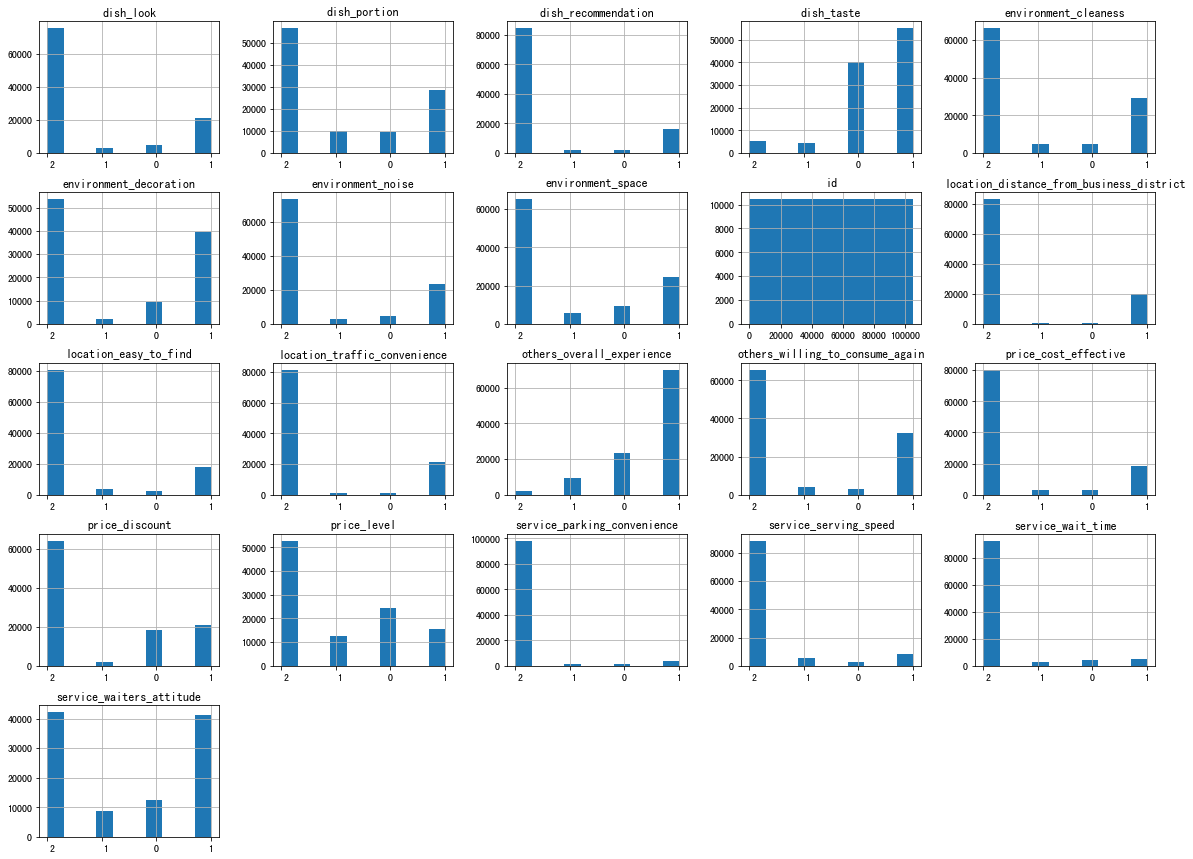

In [163]:
train.hist(figsize=(20, 15))

In [28]:
environment = train.loc[:, ['environment_cleaness', 'environment_space',
                            'environment_noise', 'environment_decoration']]

In [29]:
environment.corr()

,environment_cleaness,environment_space,environment_noise,environment_decoration
environment_cleaness,1.000000,0.571419,0.586001,0.450792
environment_space,0.571419,1.000000,0.670046,0.527254
environment_noise,0.586001,0.670046,1.000000,0.561347
environment_decoration,0.450792,0.527254,0.561347,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116e7e990>,
      dtype=object)

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


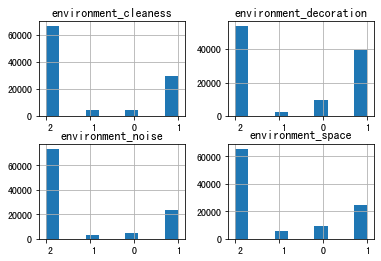

In [30]:
environment.hist()

In [74]:
list(train.columns)

['id',
 'content',
 'location_traffic_convenience',
 'location_distance_from_business_district',
 'location_easy_to_find',
 'service_wait_time',
 'service_waiters_attitude',
 'service_parking_convenience',
 'service_serving_speed',
 'price_level',
 'price_cost_effective',
 'price_discount',
 'environment_decoration',
 'environment_noise',
 'environment_space',
 'environment_cleaness',
 'dish_portion',
 'dish_taste',
 'dish_look',
 'dish_recommendation',
 'others_overall_experience',
 'others_willing_to_consume_again']

In [56]:
train['content'][3]

'"之前评价了莫名其妙被删 果断继续差评！ 换了菜单 价格更低 开始砸牌子 但套餐还是有150的 点了两份套餐 上菜顺序是沙拉 汤 餐前面包 餐中饮料 另一份汤 甜点 牛排！ 火大 上个菜上成这样 你见过谁先吃冰激凌再吃牛排的啊！ 啊？！ 两份牛排要的七分 上来一份全熟 一份不及五分熟  你厨师哪里请来的啊大街上随便拉个人过来都烤的比你好吧？！ 套餐的价格又没变 凭什么跟以前差距这么大！ 自己砸自己牌子！ 火大 负分！ 起码五角场这家不会再去了！ 再见！"'

In [55]:
train.loc[3, :]

id                                                                                          3
content                                     "之前评价了莫名其妙被删 果断继续差评！ 换了菜单 价格更低 开始砸牌子 但套餐还是有150...
location_traffic_convenience                                                               -2
location_distance_from_business_district                                                   -2
location_easy_to_find                                                                      -2
service_wait_time                                                                          -2
service_waiters_attitude                                                                   -2
service_parking_convenience                                                                -2
service_serving_speed                                                                      -2
price_level                                                                                 0
price_cost_effective                                        

In [58]:
list(train.columns)

['id',
 'content',
 'location_traffic_convenience',
 'location_distance_from_business_district',
 'location_easy_to_find',
 'service_wait_time',
 'service_waiters_attitude',
 'service_parking_convenience',
 'service_serving_speed',
 'price_level',
 'price_cost_effective',
 'price_discount',
 'environment_decoration',
 'environment_noise',
 'environment_space',
 'environment_cleaness',
 'dish_portion',
 'dish_taste',
 'dish_look',
 'dish_recommendation',
 'others_overall_experience',
 'others_willing_to_consume_again']

In [68]:
loc_cols = list(filter(lambda x : x.startswith('loc'), list(train.columns)))
service_cols = list(filter(lambda x : x.startswith('service'), list(train.columns)))
price_cols = list(filter(lambda x : x.startswith('price'), list(train.columns)))
env_cols = list(filter(lambda x : x.startswith('env'), list(train.columns)))
dish_cols = list(filter(lambda x : x.startswith('dish'), list(train.columns)))
other_cols = list(filter(lambda x : x.startswith('other'), list(train.columns)))

##### 词云

In [33]:
stopwords = list(map(lambda word: word.strip('\n'), list(open(stopwords_path))))

In [36]:
stopwords[:10], stopwords[-10:]

(['--', '?', '“', '”', '》', '－－', 'able', 'about', 'above', 'according'],
 ['非常', '非徒', '靠', '顺', '顺着', '首先', '高兴', '是不是', '说说', ' '])

In [113]:
def content_to_text(contents):
    text = ''
    for content in list(map(lambda text: jieba.lcut(str(text)), contents)):
        text += ' '.join(content)

    return text

In [117]:
train_content_text = content_to_text(train['content'][:100])

In [118]:
def show_wordcloud(data, title=None):
    wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=200, 
                          max_font_size=40, scale=3, random_state=1,
                          font_path="/System/Library/fonts/PingFang.ttc").generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

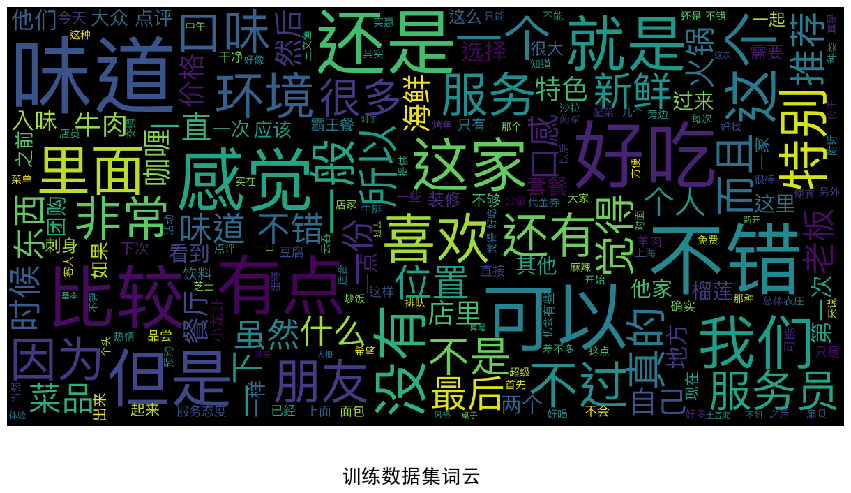

In [120]:
show_wordcloud(train_content_text, '训练数据集词云')

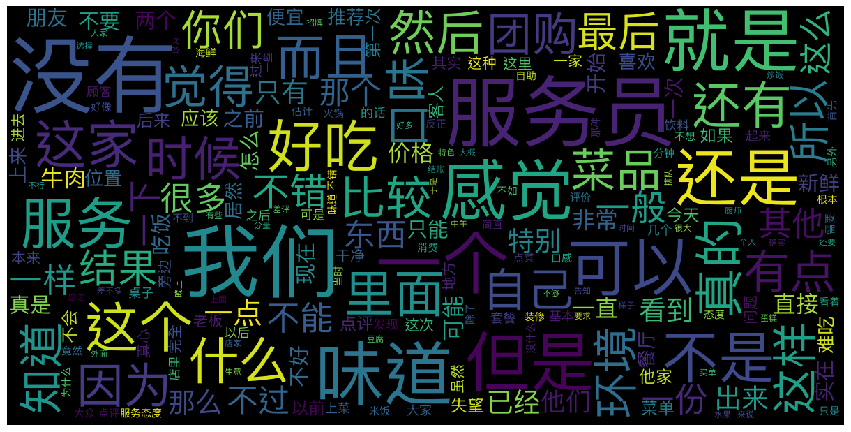

In [124]:
show_wordcloud(content_to_text(train[train.others_overall_experience==-1]['content'][:1000]))

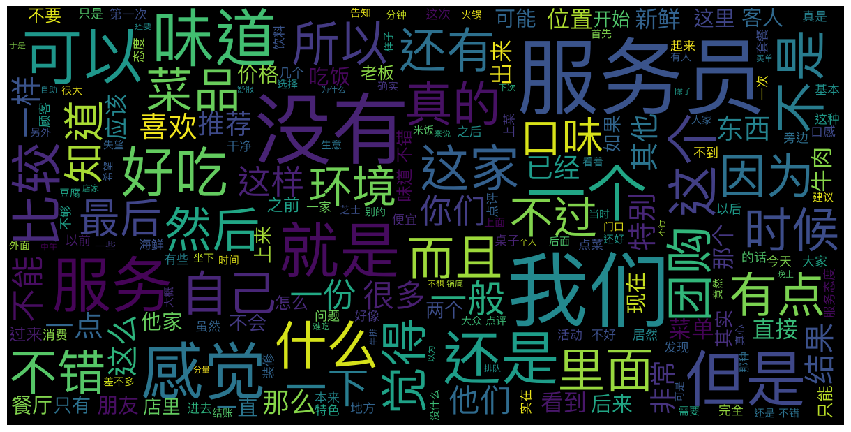

In [123]:
show_wordcloud(content_to_text(train[train.service_waiters_attitude==-1]['content'][:1000]))

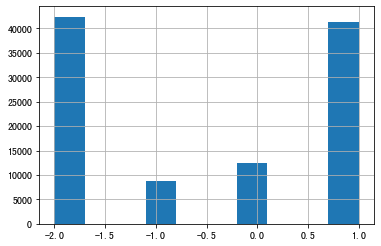

In [125]:
train['service_waiters_attitude'].hist()

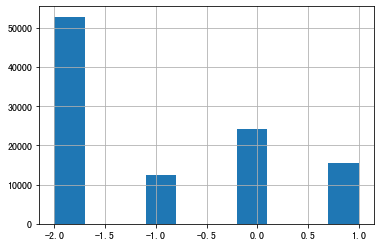

In [127]:
train['price_level'].hist()

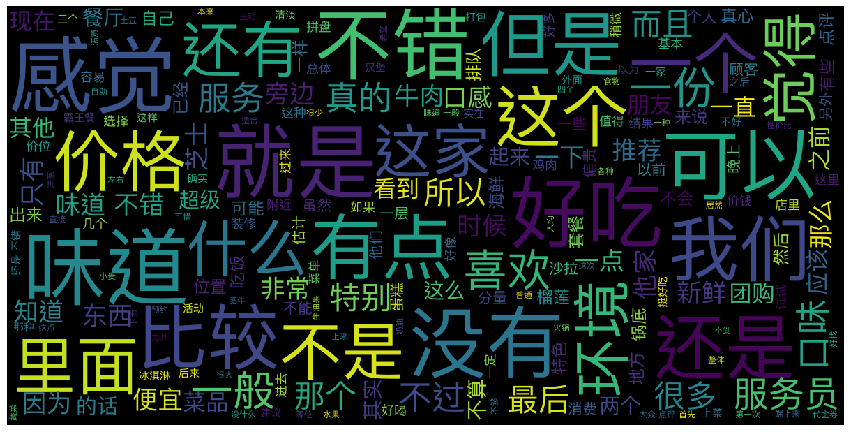

In [132]:
show_wordcloud(content_to_text(train[train.price_level==-1]['content'][:100]))

##### 子类之间的关系

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124897410>,
      dtype=object)

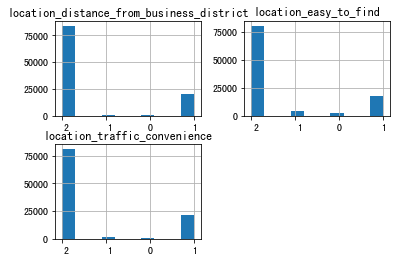

In [73]:
train[loc_cols].hist()

In [75]:
train[loc_cols].corrr()

,location_traffic_convenience,location_distance_from_business_district,location_easy_to_find
location_traffic_convenience,1.000000,0.205200,0.292005
location_distance_from_business_district,0.205200,1.000000,0.252344
location_easy_to_find,0.292005,0.252344,1.000000


In [96]:
train[loc_cols+other_cols].corr()

,location_traffic_convenience,location_distance_from_business_district,location_easy_to_find,others_overall_experience,others_willing_to_consume_again
location_traffic_convenience,1.000000,0.205200,0.292005,0.105656,0.024558
location_distance_from_business_district,0.205200,1.000000,0.252344,0.073303,0.018702
location_easy_to_find,0.292005,0.252344,1.000000,0.109634,0.064299
others_overall_experience,0.105656,0.073303,0.109634,1.000000,0.206996
others_willing_to_consume_again,0.024558,0.018702,0.064299,0.206996,1.000000


**是否容易寻找`location_easy_to_find`与消费感受`others_overall_experience`最相关**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120364a10>,
      dtype=object)

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


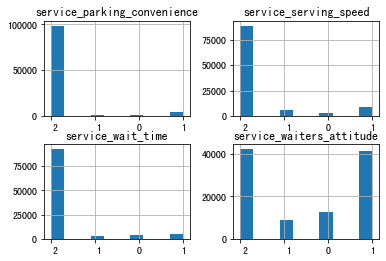

In [77]:
train[service_cols].hist()

In [79]:
train[service_cols].corr()

,service_wait_time,service_waiters_attitude,service_parking_convenience,service_serving_speed
service_wait_time,1.000000,-0.004035,0.016821,0.094454
service_waiters_attitude,-0.004035,1.000000,0.053520,0.104269
service_parking_convenience,0.016821,0.053520,1.000000,0.035177
service_serving_speed,0.094454,0.104269,0.035177,1.000000


In [94]:
train[service_cols+other_cols].corr()

,service_wait_time,service_waiters_attitude,service_parking_convenience,service_serving_speed,others_overall_experience,others_willing_to_consume_again
service_wait_time,1.000000,-0.004035,0.016821,0.094454,0.006241,0.003807
service_waiters_attitude,-0.004035,1.000000,0.053520,0.104269,0.148582,0.087306
service_parking_convenience,0.016821,0.053520,1.000000,0.035177,0.048622,0.016438
service_serving_speed,0.094454,0.104269,0.035177,1.000000,0.018213,0.012173
others_overall_experience,0.006241,0.148582,0.048622,0.018213,1.000000,0.206996
others_willing_to_consume_again,0.003807,0.087306,0.016438,0.012173,0.206996,1.000000


**服务人员态度`service_cols+other_cols`与消费者感受`others_overall_experience`最相关**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120436a10>,
      dtype=object)

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


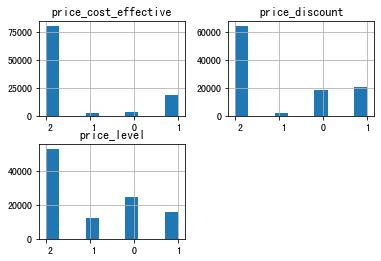

In [81]:
train[price_cols].hist()

In [83]:
train[price_cols].corr()

,price_level,price_cost_effective,price_discount
price_level,1.000000,0.285372,0.074549
price_cost_effective,0.285372,1.000000,0.138220
price_discount,0.074549,0.138220,1.000000


In [1]:
train[price_cols+other_cols].corr()

NameError: name 'train' is not defined

**折扣力度`price_discount`与消费感受最相关**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128e59310>,
      dtype=object)

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


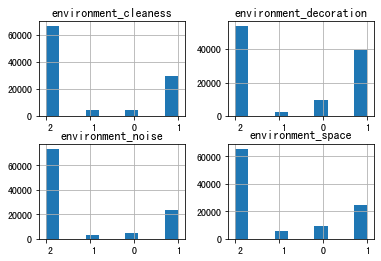

In [84]:
train[env_cols].hist()

In [85]:
train[env_cols].corr()

,environment_decoration,environment_noise,environment_space,environment_cleaness
environment_decoration,1.000000,0.561347,0.527254,0.450792
environment_noise,0.561347,1.000000,0.670046,0.586001
environment_space,0.527254,0.670046,1.000000,0.571419
environment_cleaness,0.450792,0.586001,0.571419,1.000000


In [93]:
train[env_cols + other_cols].corr()

,environment_decoration,environment_noise,environment_space,environment_cleaness,others_overall_experience,others_willing_to_consume_again
environment_decoration,1.000000,0.561347,0.527254,0.450792,0.129093,0.068929
environment_noise,0.561347,1.000000,0.670046,0.586001,0.078968,0.052045
environment_space,0.527254,0.670046,1.000000,0.571419,0.092743,0.050382
environment_cleaness,0.450792,0.586001,0.571419,1.000000,0.088093,0.058747
others_overall_experience,0.129093,0.078968,0.092743,0.088093,1.000000,0.206996
others_willing_to_consume_again,0.068929,0.052045,0.050382,0.058747,0.206996,1.000000


**环境装修情况`environment_decoration`与消费感受`others_overall_experience`最相关**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128e7e850>,
      dtype=object)

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


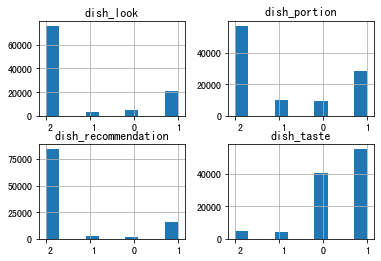

In [86]:
train[dish_cols].hist()

In [88]:
train[dish_cols].corr()

,dish_portion,dish_taste,dish_look,dish_recommendation
dish_portion,1.000000,0.132308,0.085120,0.076639
dish_taste,0.132308,1.000000,0.116982,0.118284
dish_look,0.085120,0.116982,1.000000,0.102963
dish_recommendation,0.076639,0.118284,0.102963,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12961a350>,
      dtype=object)

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


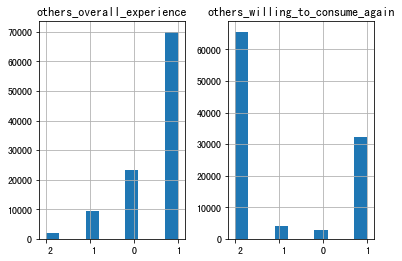

In [89]:
train[other_cols].hist()

In [92]:
train[dish_cols + other_cols].corr()

,dish_portion,dish_taste,dish_look,dish_recommendation,others_overall_experience,others_willing_to_consume_again
dish_portion,1.000000,0.132308,0.085120,0.076639,0.127727,0.047974
dish_taste,0.132308,1.000000,0.116982,0.118284,0.439803,0.137897
dish_look,0.085120,0.116982,1.000000,0.102963,0.104114,0.036737
dish_recommendation,0.076639,0.118284,0.102963,1.000000,0.123809,0.072109
others_overall_experience,0.127727,0.439803,0.104114,0.123809,1.000000,0.206996
others_willing_to_consume_again,0.047974,0.137897,0.036737,0.072109,0.206996,1.000000


**菜品口感`dist_taste`与消费感受`others_overall_experience`最相关**

##### 大类之间的关系

最相关子类别与消费感受的相关性

In [125]:
most_related_cols = ['dish_taste', 'environment_decoration', 'price_discount', 
                     'service_waiters_attitude', 'location_easy_to_find', 'others_overall_experience']

train[most_related_cols].corr()

,dish_taste,environment_decoration,price_discount,service_waiters_attitude,location_easy_to_find,others_overall_experience
dish_taste,1.000000,0.086831,0.071509,0.099750,0.077836,0.439803
environment_decoration,0.086831,1.000000,0.030776,0.157576,0.112978,0.129093
price_discount,0.071509,0.030776,1.000000,0.120908,0.105654,0.121684
service_waiters_attitude,0.099750,0.157576,0.120908,1.000000,0.097796,0.148582
location_easy_to_find,0.077836,0.112978,0.105654,0.097796,1.000000,0.109634
others_overall_experience,0.439803,0.129093,0.121684,0.148582,0.109634,1.000000


In [127]:
train[most_related_cols].corr()['others_overall_experience']

dish_taste                   0.439803
environment_decoration       0.129093
price_discount               0.121684
service_waiters_attitude     0.148582
location_easy_to_find        0.109634
others_overall_experience    1.000000
Name: others_overall_experience, dtype: float64

**相关性，菜品 > 服务 > 环境 > 价格 > 位置**

##### 评论内容

In [135]:
content = train['content']

In [136]:
content

0         "吼吼吼，萌死人的棒棒糖，中了大众点评的霸王餐，太可爱了。一直就好奇这个棒棒糖是怎么个东西，...
1         "第三次参加大众点评网霸王餐的活动。这家店给人整体感觉一般。首先环境只能算中等，其次霸王餐提...
2         "4人同行 点了10个小吃\n榴莲酥 榴莲味道不足 松软 奶味浓\n虾饺 好吃 两颗大虾仁\...
3         "之前评价了莫名其妙被删 果断继续差评！ 换了菜单 价格更低 开始砸牌子 但套餐还是有150...
4         "出乎意料地惊艳，椰子鸡清热降火，美容养颜，大大满足了爱吃火锅怕上火星人。椰子冻是帅帅的老板...
5         "烤鸭使用的蘸酱很地道，觉得烤鸭好不好吃在很大程度上都取决于这个酱料是否正宗。个人感觉他们家...
6         "在好友圈很红的原因很诡异.竟然基本都是我外地的朋友转发的.不远千里跑来厦门买回去吃.吃完各...
7         "中午饭点人比较多需要排队～2点左右去吃的刚好可以用团购～也不用排队～就是平安夜店员说的都不...
8         "跟朋友相约25号看港囧，首映当天排片率超高，为了提前订好票，选了文投国际影城，为了看电影我...
9         "首先感谢大众点评再次抽中我免费品尝火锅，同时也感谢古蜀雒味三星堆主题火锅商家提供这个平台，...
10        "这次必须给全五分！因为太完美了！整个就餐体验相当棒！\n口味：菜品做的都很干净！有图有真相...
11        "突然特别想吃点重口味的，就和老公商量了去吃辣府。以前都不太敢吃辣的。没想到不是周末都要排队...
12        "和闺蜜相约欧亚达鱼酷，三个人竟然喜欢不同口味，最后只得放弃我最爱的黄金酸辣，吃的油泼香辣口...
13        "很棒的一次自助体验～之前就团好的券 一直延期就一直推 今天才来吃了～\n【地址】在火车站附...
14        "在星和园后门的临街铺面，3家粉店并排在一起，五角星螺丝粉人气比较足，而最左边的这家缘滋味美...
15        "第二次来吃了，因为这里价廉物美，所以老公坚持要带全家人再来吃一次，这次是包房，貌似没有最低...
16        "很感谢大众点评网和店家举办的这次试吃活动 结识了很多新朋友

**评论内容，有的是一个句子，有的是多个句子。**

In [137]:
content[2].split('\n')

['"4人同行 点了10个小吃',
 '榴莲酥 榴莲味道不足 松软 奶味浓',
 '虾饺 好吃 两颗大虾仁',
 '皮蛋粥 皮蛋多 但是一般 挺稠的',
 '奶黄包 很好吃 真的是蛋黄和奶 而且真的是流沙',
 '叉烧包 面香',
 '鲜虾烧卖 好吃 外面的黄色皮看着让人特别有食欲',
 '云吞面 云吞分量足 但是汤头不是很好喝 而且云吞的馅儿不知为何感觉不是很新鲜',
 '鲍汁腐皮卷 没怎么吃 味道倒是不错',
 '排骨 味道不错 不算很腻 但是油确实微多',
 '鲜虾锅贴 确实今天吃了很多虾 这个很酥脆，里头的虾也很好吃',
 '',
 '刚好有优惠券，所以4个人花了100不到【这个优惠券只能在1层用，5层用不了】',
 '',
 '原价大概人均50',
 '',
 '服务一般，上菜速度倒是很快，人挺多，坐在沙发上感觉很舒服"']

In [156]:
train.loc[2, :].drop('content')

id                                           2
location_traffic_convenience                -2
location_distance_from_business_district    -2
location_easy_to_find                       -2
service_wait_time                           -2
service_waiters_attitude                     0
service_parking_convenience                 -2
service_serving_speed                        1
price_level                                  0
price_cost_effective                        -2
price_discount                               1
environment_decoration                      -2
environment_noise                           -2
environment_space                            1
environment_cleaness                        -2
dish_portion                                 0
dish_taste                                   1
dish_look                                   -2
dish_recommendation                         -2
others_overall_experience                    0
others_willing_to_consume_again             -2
Name: 2, dtyp

In [138]:
content[104986].split('\n')

['"昨天元旦，家里人决定去拔草。',
 '交通方便，地铁6号线出来马路对面就是了。',
 '地方很大，v26包房的座位拥挤(16人)，应该是12人的包房吧。。。。',
 '阿姨和姐姐点的是套餐+另点了几个小菜。喜欢烤鸭，白斩鸡，熏鱼(妈妈说好吃)，蔬菜色拉，虾仁(不知道是清炒河虾仁还是水晶虾)，西瓜，生煎包。菜(应该算)量足，生煎包的个头特大，味道不错。',
 '就是当初想问再大点的包房的时候，说是不对外开放。。。。(叹气)本来还想在生日的时候订位置呢。算了，放弃了。"']

In [140]:
content[104998].split()

['"和票专程来这边找美食吃，早就听说这家店，刚好路过就来试下～',
 '按照大众的地图导航还是比较好找的，就在路边的一个小门面。环境就是外边放的几张桌椅，那天比较凉快，所以还是挺惬意的',
 '我们点了推荐的德国纽伦堡肠热狗，用的单人餐团购：饮料，热狗，薯泥。我们两人吃一个单人团购就快饱了，其实团购还是比较划算的～',
 '再说说这个热狗。真的是挺大一根肠，而且外脆里香，口感非常好～真的不是一般的火腿。一咬下去，唇齿留香，赞！还有土豆泥也很不错，加的番茄酱和什么酱，吃起来不会腻反而有些解腻爽口，而且还保留土豆泥的香，也不错～',
 '虽然远远跑来，但是吃到这个热狗还是超级满足，下次有机会一定再来"']

In [150]:
train.loc[104998, :].drop('content')

id                                          104998
location_traffic_convenience                    -2
location_distance_from_business_district        -2
location_easy_to_find                            1
service_wait_time                               -2
service_waiters_attitude                        -2
service_parking_convenience                     -2
service_serving_speed                           -2
price_level                                     -2
price_cost_effective                            -2
price_discount                                   0
environment_decoration                          -2
environment_noise                               -2
environment_space                               -2
environment_cleaness                            -2
dish_portion                                     1
dish_taste                                       1
dish_look                                       -2
dish_recommendation                             -2
others_overall_experience      

In [158]:
content[104982].split('\n')

['"周一过来的人不是很多的样子，但是味道还是不错的，性价比也不错哦~！',
 '',
 '【停车】停在门口有车位的，就是有点窄，进去不太方便。停车不收费~',
 '',
 '【环境】比较干净，只是人很少，有些冷冷清清的样子。也可能是因为周一还下雨的缘故吧。',
 '',
 '【服务】服务超赞，服务热情大方彬彬有礼，并没有因为当天客人少就怠慢了。上菜也比较快，会询问是否需要加菜什么的。',
 '',
 '【菜品】',
 '',
 '#冷菜#种类繁多，比较喜欢的是#含羞草沙拉#，以前都木有吃过的说，吃起来特别可口！！！其他的各种#沙拉#也超级多~~还有各种点心和水果什么的~~',
 '',
 '#烤肉#相比起沙拉来感觉种类略少啊，至少和之前吃过的中关村那家比起来，不过可能因为客人比较少吧，店家没有制作太多也是可以理解的~！没有别家那种小表格，就是吃了一种就给你盖章的那个，那样的话至少能保证我每种都吃到呀，这样的话我都不知道自己吃过了神马……',
 '',
 '比较喜欢#牛舌#，香嫩可口。另外#烤鱿鱼#的味道也不错。啊啊啊，名字都记不太清了……反正味道都还是不错的，朋友喜欢吃蜜汁肉，让上了好几次~！',
 '',
 '【总评】还是比较满意的，朋友也喜欢，有机会还会再来的，希望加油哦~"']

In [161]:
content[104972].split('\n')

['"#推荐美图给益达要吃榜#',
 '很意外的参加了DP的试吃',
 '是有小伙伴没来，所以有幸做了回黄金替补',
 '潮楼，原来是在久光楼上的吧，一直想去没去成',
 '没想到这次拔了草了',
 '在久光的时候是那种半开放式的环境，',
 '搬到晶品，要比原先的大气舒适了',
 '顶上是雅致的水晶吊灯，大圆桌很宽敞，坐十个人也不拥挤',
 '最大变化就是有了个漂亮的露台啊！',
 '特别是这样秋天的夜里，凉风轻拂，坐在特别的摇摇椅上品尝美食，别有情趣啊！',
 '潮州菜，要的就是个精致和原味',
 '先来说说冷菜',
 '【脆皮鸡】鸡很鲜嫩，皮还真的是很脆，喜欢',
 '【胭脂脆菇色拉】好可爱的小番茄，里头加了色拉酱，很好吃',
 '【私房拌花螺】装盘好艺术，花螺切成小片，微微辣，里头的花生也很香脆',
 '热菜里最爱的有',
 '【潮式冻乌鱼】其实在潮州这个菜也算是个经典吧。肉很多，嫩嫩的，沾酱吃，味道还是蛮鲜美的',
 '【盘龙蒸青斑】和冻乌鱼相比，我更爱这道菜，',
 '汁水是菜上来后，服务员再浇上去的，这样就不会盖掉鱼肉本来的鲜味了吧。',
 '鱼肉漂漂的，蛮肥厚的感觉，没什么刺，我喜欢',
 '【潮州酱焗斑节虾】虾很新鲜，烧制入味，很细心的剪去了虾须和虾足，所以不会怕被扎嘴巴咯',
 '【贵妃泡饭】在米粒进入锅中的滋啦声中，一股香气扑鼻而来，服务员会帮客人分成一小碗一小碗的',
 '里头的料很足啊，鲜香，一口不过瘾',
 '【潮式炸普宁贵妃泡饭豆腐】豆腐外脆里嫩的，其实一上来以为是点心呐',
 '说到点心，潮州菜的点心也是招牌啊',
 '【白糖糕】软糯Q，不会太甜',
 '【榴莲酥】榴莲味道蛮浓郁的，我是比较爱榴莲的，所以觉得好吃',
 '甜点也是养眼又美味',
 '【木糠】小甜，不会很腻',
 '我点的饮料是【清凉夏日】原本只是因为漂亮，没想到味道也很OK，小酸小甜，赞的',
 '很开心很满意的一次试吃体验',
 '感谢DP咯！"']

##### 总结

数据缺失情况

* 没有缺失数据

类别相关性

* 位置、服务、价格、环境、菜品与整体感受的相关性，菜品 > 服务 > 环境 > 价格 > 位置
* 环境的子类别，装修情况、嘈杂情况、就餐空间存在很大的相关性

评论内容

* 评论内容有的有的是一行，有的是多行，多行时，
* 评论是多行时，有可能分别对应的子类别的评价内容， `split`有的行时空，需要进行预处理数据
* 需要进行预处理